# Support Vector Machines (SVM)

In this tutorial you will develop strong understanding and technical knowledge of key concepts in machine learning models creation, parameters tuning, testing and (optional) deployment: 


* Overview of SVM 
* The concept of decision boundary and margins 
* Hyper-parameters 
* Over fitting and under fitting models 
* Example with real dataset

**Relevant Links:** 

* If you want to know more about Face Recognition Applications https://face-rec.org/
* For image loading and manipulation see this link https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/
* Parts of the materials presented here are adapted from  https://www.oreilly.com/library/view/python-data-science/9781491912126/
* Useufl tutorial https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html




## Margins and Decision Boundary 

Sometimes, it is useful  to generate and synthesise some data points to test how your machine learning algorithm perform. The good thing about this approach, is that you can control the way you generate this data. For example, below is the code for generating a linearly separable dataset 

### Linear Data

In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
# this code generate random dataset representing two different classes
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)

# store it in data frame 
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

,x,y,label
0,3.353209,1.699580,1
1,1.366786,0.634972,1
2,0.224593,4.770282,0
3,0.443599,3.115309,0
4,2.768085,1.087829,1


Then, you can plot the data set to get more insight about it. Notice that you can change the colour scheme `cmap=?` to one of these options ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']. The code below plots the 2D dataset :



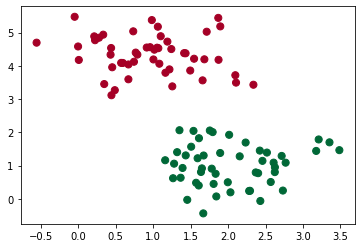

In [4]:
# plot x, and y 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn');

**Notice**_ that with the above dataset, a simple linear classifier would attempt to draw a straight line separating the two classes of data, and so achieve a perfect classifier that completely separates the two classes. Typical lines may separate the data as follows:  


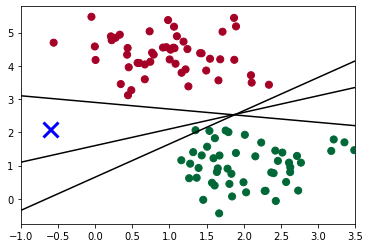

In [5]:

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
plt.plot([-0.6], [2.1], 'x', color='blue', markeredgewidth=3, markersize=15)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Although, you don’t need to worry much about the code that generates the lines. Think of these lines as separate classifiers or machine learning models. The **question** that should be asked, which one of the above is the best learning model? Remember, you are building your machine-learning model / classifier to be able to predict/ classify new data points, not just the data points in your training dataset. 

Consider the new point marked by the blue **X**, you will see that a line separating the two classes perfectly is not necessarily a good choice. This motivates the need for better learning method, and here comes **Support Vector Machine** as a possible solution to handle such situation



### Linear SVM 


Support vector machines aims to find the decision boundary (the line) that maximises the margin separating the two classes in the dataset. So back to our example above, we are looking for the line that best separate the two classes in our dataset

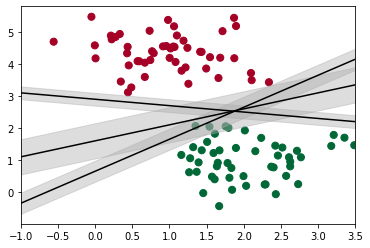

In [6]:
# create a set of evenly spaced numbers
xfit = np.linspace(-1, 3.5)
# plot the points in the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')

# fit lines to the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Create and Fit SVM Model 

In **SVM**, the optimisation objective is to maximise the margin (i.e. distance separating line to the support vectors). Although the mathematics behind **SVM** may be demanding to you, the implementation using the Python `sklearn` library is quite straight forward. Lets see how we can implement SVM, and visualise the results. Pay attention to the **C** parameter, it has been set to be large. Check the lecture notes to see what does this mean? 

In [7]:
from sklearn.svm import SVC # support vector classifier
# create a model with linear kernal 
model = SVC(kernel='linear', C=1E10)
# fit the model in the data above
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

It is good to visualise the results of the model, and check the hyperplane, the support vectors, and inspect any misclassified examples. The function below does this for you:

In [8]:
# code adapted from 
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    # linespace create evenly spaced numbers
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    plt.plot([1], [3.057891], 'o', color='green', markeredgewidth=1, markersize=7)
    plt.plot([1], [3.5057891], 'o', color='green', markeredgewidth=1, markersize=7)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

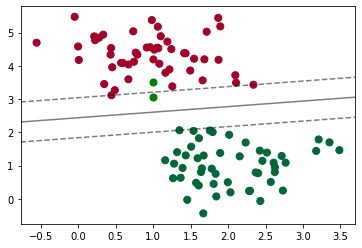

In [9]:
# plot the points 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
# plot the model decision boundary (margins)
plot_svc_decision_function(model);

Go back to the model above, the line of code `model = SVC(kernel='linear', C=1E10)` and choose smaller value to the parameter 'C`, re-run the code, and notice the impact on the margin separating the two classes. Notice that the value **IE10** is a large value



### Nonlinear Data  

Again, best way to understand how SVM works with non-linear datasets is to generate some non-linear data. In the following example, we will use the `make_moons` function to generate this data:

In [10]:
# import necessary libraries 
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [11]:
# generate the data 
X, y = make_moons(n_samples=200, noise = 0.15)

In [12]:
# lets store the data in a data frame 

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

,x,y,label
0,0.333509,-0.120811,1
1,0.943316,0.567523,0
2,0.497261,-0.513649,1
3,0.300242,-0.114237,1
4,1.086318,0.389622,0


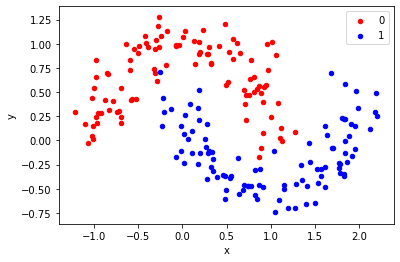

In [13]:
# now lets plot the data 
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
# create two groups of  data based on the label
grouped = df.groupby('label')
# plot each group of data with different color
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

One way to handle this data is to add more features such as polynomial features i.e. if your data is $x_{1},x_{2}$, then you can add more polynomial features to it such as $x_{1}^{2}, x_{2}^{2}$ and so on. In Python, this can be easily done using `PolynomialFeatures` as shown below. We will also introduce the use of `pipeline` in Python which is very powerful method that allows you to apply more than one method. So, in the code below, we create a `Pipeline` to add polynomial features, scale it to a standard scale (important step), and fit the SVM model.

In [20]:
# create a pipleline for pre-processing and fit the model 
poly_kernel = Pipeline([
    # features of degree three x, x^2 and x^3
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_model",SVC(kernel='poly',gamma='auto',degree=3,coef0=1,C=5))
])

In [21]:
# now fit the data to the model 
clf_poly = poly_kernel.fit(X,y)

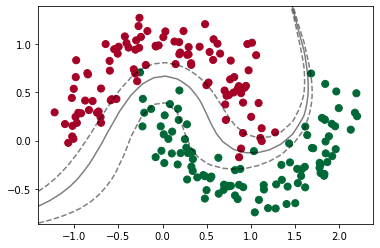

In [22]:
# lets plot the results and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
plot_svc_decision_function(clf_poly, plot_support=False);


**Try** to change the `C` value to a higher value (i.e. 100) and see the effect on the above model's performance, specially the margin width. Change the degree of the polynomial to 5, and check re-run the code above. One more thing, you can always visualise the decision region using the `mlxtend` library as shown below (if you don't want to use the function above) 

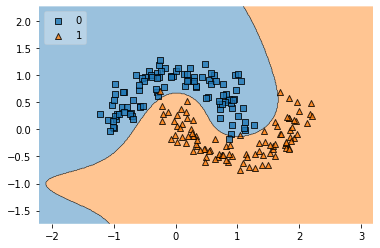

In [23]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf_poly, legend=2)
plt.show()

### Kernel Methods 

#### Polynomial Kernel

The above technique is one way to handle the data, however, with high dimensional data, the method can become very slow. Therefore, better is to use the `kernel` trick we talk about in the lecture note. Here, using SVM, you can apply all the complex math behind it using few lines of codes. Below, we use the `poly` kernel instead of the polynomial features above:

### Gaussian RBF Kernel 

Another way to handle the data non-linearity is to use the very common non-linear kernel **Radial Basis Function** (RBF). This method is based on similarity features, that is used to add more features to the data. Similarity measure function here, measures how much each instance (i.e. a row in your dataset) resembles a particular landmark.  Despite the complex math behind RBF, implementing it using `sklearn` is straight forward: 

In [24]:
# create a pipleline for pre-processing and fiting the model 
rbf_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_model",SVC(kernel='rbf',gamma=7,C=0.013))
])

In [25]:
# now fit the data to the model 
clf_rbf = rbf_kernel.fit(X,y)

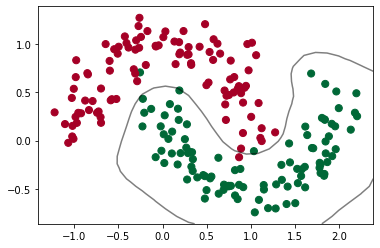

In [26]:
# lets plot the results and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
plot_svc_decision_function(clf_rbf, plot_support=False);


**Try this**: Again, you can change the parameters of the kernel_rbf, and re-run the code above to see the impact on the model's performance. The most important parameter to consider with **RBF** kernels is the `gamma` parameter. Set `gamma` to **50**, and think which solution is better? 

* `gamma` is works as a regularisation parameters 
* If you think your model is overfitting, then certainly you should reduce its value
* If you think your model is underfitting, then you should increase its value (similar to the C parameter)

## Complete Example with SVM

Ok, in the above examples, we used toys datasets to reinforce your understanding of SVM, Decision Boundaries, and Hyper parameters settings. Lets now put all we learnt into one complete example: We will use SVM to create a Face Recognition (FR) system. FR is very important for wide range of application, in particular for security and border control. We will use a dataset that comes with one of Python Libraries. It consists of several thousand photos of various public figures.  



### Load Data 

First, lets load the dataset from within Pyhon library using the `fetch` method. You can read more about the dataset at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html. The code below might take some time on your machine: 

In [27]:
import warnings
warnings.filterwarnings('ignore')# ignore warnings 

from sklearn.datasets import fetch_lfw_people # this is the dataset
# get the data, with 60 images per person 
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Explore the Dataset

We can view some of the images in the dataset. Below, we view few images along with the names 

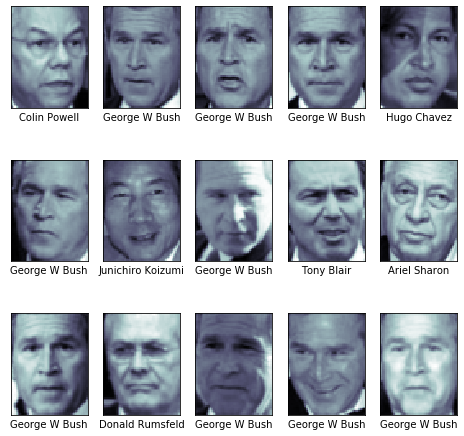

In [28]:
# create grid of 5 x 3 to sohw images 
fig, ax = plt.subplots(3, 5,figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

You can think of the above images as any other dataset we have been dealing with. Each image is 62 X 47 pixels. In computer vision, such image will be presented as  a one feature vector of size $62 X 47 = 2914$, you can think of this as a row of **2914** pixels for each images 

$[pixel_{00}, pixel_{01}, … , ... , pixel_{02914}]$<br>
$[pixel_{10}, pixel_{11}, … , ... , pixel_{12914}]$<br>
$[pixel_{20}, pixel_{21}, … , ... , pixel_{22914}]$



* Given this arrangement, we can simply proceed and feed all the pixels of each image into our machine learning algorithm (SVM). 

* However, in this task we will use something called Principle Component Analysis (**PCA**). This is an important method, that simply used to reduce the dimension of the data, without causing much information loss.  You can think of **PCA** as a method that projects a dataset of certain dimension into lower dimension (i.e. project 3D into 2D). 

* Notice that also for the above data, the label or $y$ is actually the name of the person in the image.



### Pre-process and Model's Creation 


**Pipeline**: The code below applies PCA to reduce the dimension of our data from almost 3000 into only 150, meaningful dimension and feed it into our Support Vector Machine. These two steps can be combined together into a single pipleline using the python `Pipeline`. Notice, here we define our pipeline using the mehtod `make_pipeline` as outlined below:  



In [29]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# create dimenssion reduction 
pca = PCA(n_components=150, whiten=True, random_state=42)
# create your SVM model with RBF kernel 
svc = SVC(kernel='rbf', class_weight='balanced')
# your pipline 
model = make_pipeline(pca, svc)

### Train / Test Split

As always, it is important to keep part of our dataset for testing and validation of our model’s performance: 

In [30]:
from sklearn.model_selection import train_test_split
# random_state is for results reproduction 
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [31]:
# check the shape of the data
print(f'The size of the Training set is {X_train.shape[0]}')
print(f'The size of the Training set is {X_test.shape[0]}')
# notice the number of column in the dataset
print(f'The number of columns in the training and testing set is {X_train.shape[1]}')


The size of the Training set is 1011
The size of the Training set is 337
The number of columns in the training and testing set is 2914


In [32]:
# You should know the data types of X_train / y_train (numpy array)
print(f'Type of X_train {type(X_train)}')
print(f'Type of y_train {type(y_train)}')

Type of X_train <class 'numpy.ndarray'>
Type of y_train <class 'numpy.ndarray'>


### Hyperparameter Tuning

Recall, that we have seen several parameters such as `C` and `gamma`. Clearly, these two parameters are important for the performance of the module. You can try to set these manually, but this can be time consuming. However, here, we will use **grid search** to get the best set of parameters.

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

* Now, fit the data and search for the best parameters 

In [34]:
warnings.filterwarnings('ignore')# ignore warnings 

grid.fit(X_train, y_train)
best_params = grid.best_params_


In [35]:
# check best parameters
print(best_params)

{'svc__C': 10, 'svc__gamma': 0.001}


* Now, lets use our model to predict the labels (names) of the test images 


### Best Model Fit

In [36]:
# best model we have 
model = grid.best_estimator_
y_predicted = model.predict(X_test)


* Lets check some of our predictions. We will flag wrong predictions with **red** labels along the images 

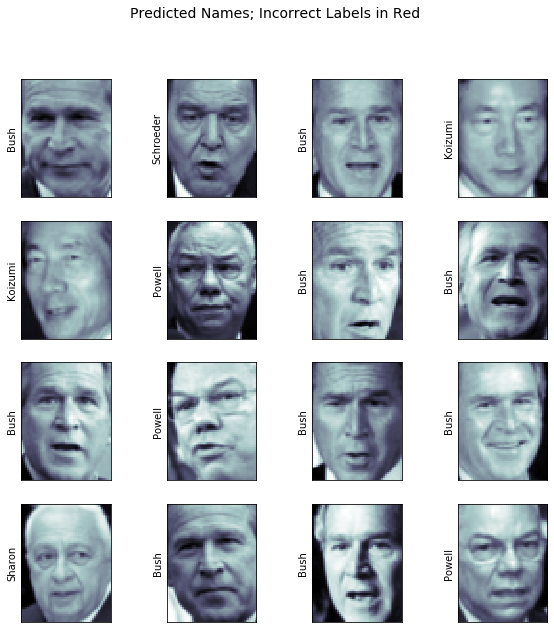

In [37]:
fig, ax = plt.subplots(4, 4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1],
                   color='black' if y_predicted[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);



* Lest now look at evaluation metrics to assess the quality of our model: 

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



* Also, it is always useful to view  the confusion matrix (lecture notes):

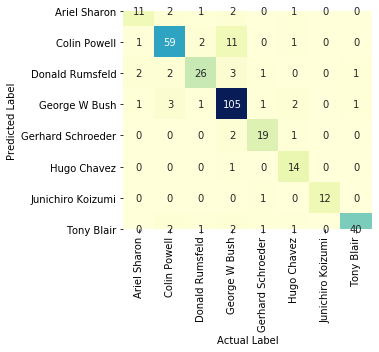

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# compare the actual label against the predicted label
mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,cmap="YlGnBu",
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');

## Save the Model 

As we did last week, we can now save the model for later use: 

In [40]:
import pickle
# Save to file in the current working directory
pkl_filename = "svm_model.pkl"
# save your model that was created above (lg_model)
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)


* And, you can always load it and re-use it, without the need to retrain it again, as follows: 

In [41]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
# Lets test the mode loaded from a file and check results
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_hat = pickle_model.predict(X_test)

Test score: 84.87 %


In [42]:
# you can save your test set as a data frame as below
df = pd.DataFrame(X_test)
# add the label 
df['Label']=y_test
# save to csv
df.to_csv('Xy_test.csv', index=False)


* A code to view specific image (change `i`) 

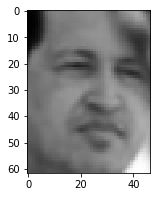

In [44]:

# set figure size 
fig = plt.figure(figsize=(3,3))
# split features and labels into two differen dataframes 
features = df.loc[:, df.columns != 'Label']
labels = df['Label'].to_numpy()

# Change i to view different images 
i = 23
# notice we convert it to numpy array and reshape it
image_to_show = features.iloc[i].to_numpy()
# reshape it to fit our model
image_to_show = image_to_show.reshape(62,47)
#fig.suptitle('This is ',labels[0:1], size=14);
label= faces.target_names[labels[i]]
if 1==1:
    color='black'
else:
    color = 'red'
#fig.suptitle(label, size=14);

plt.imshow(image_to_show, cmap=plt.get_cmap('gray'))

plt.show()  

* perform some predictions using the loaded model


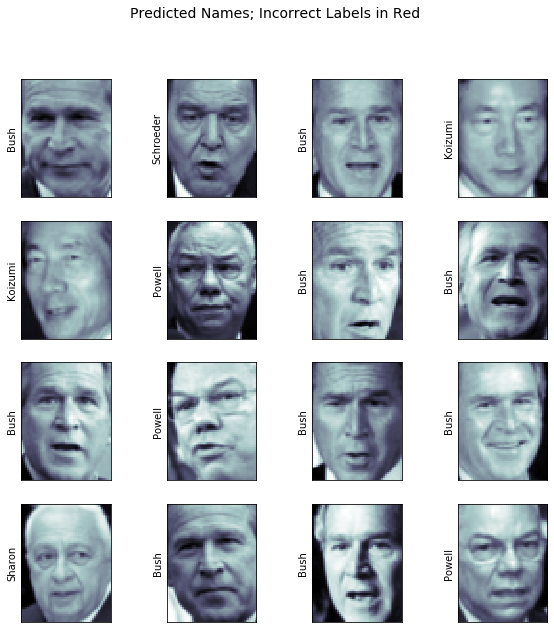

In [45]:
y_predictedp = pickle_model.predict(X_test)

fig, ax = plt.subplots(4, 4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1],
                   color='black' if y_predictedp[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


## Streamlit App (Optional)

See `myApp.py` on the module's page for more details. I will also demonstrate this in the lab. Although this is *optional*, I highly recommend having a look. It would greatly help you understand the concepts of deploying and using machine learning models to perform real tasks.

